##  Intro to Keras - White Wine

In [56]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from matplotlib.pyplot import plot
%matplotlib inline

In [16]:
df = pd.read_csv('../data/wine_quality_white.csv', sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


### Linear Regression

In [4]:
features = df.drop('quality', axis=1)
target   = df['quality']

In [6]:
mu = features.mean()
sd = features.std()
features_s = (features - mu)/sd
features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [7]:
X  = features_s.values
y = target.values

In [12]:
# Keras
model = Sequential()
# Add a layer - Dense connects everything to everythig
model.add(Dense(1, input_shape=(11,)))

model.compile(loss='mean_squared_error', optimizer='Adam')

hist = model.fit(X, y, epochs=100, verbose=0)

# [-1] get last part of history
mse = hist.history['loss'][-1]
rmse = np.sqrt(mse)
print('RMSE = ', rmse, ', baseline RMSE = ', y.std())

RMSE =  0.7513538100636097 , baseline RMSE =  0.8855481621683543


In [13]:
df.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

One is 2195 and another is 5.  Called imballenced

## Logistic regression

In [18]:
df = pd.read_csv('../data/wine_quality_white.csv', sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [22]:
df.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

Bins are not balanced. Cut into 2 groups, one 'bad' and the other 'good'.
[0, 0.7, 1] says put 70% of data in 'bad'

In [64]:
df['rating'] = pd.qcut(df.quality, [0, 0.7, 1.0], labels=['bad', 'good'], retbins=False)
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,bad


In [65]:
df.rating.value_counts()

bad     3838
good    1060
Name: rating, dtype: int64

In [46]:
features = df.drop(['quality', 'rating'], axis=1)
target   = df['rating']
target.head(3)

0    bad
1    bad
2    bad
Name: rating, dtype: category
Categories (2, object): [bad < good]

In [47]:
target = pd.get_dummies(target)
target.head(3)

,bad,good
0,1,0
1,1,0
2,1,0


In [48]:
X = features.values
Y = target.values
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [49]:
X.shape

(4898, 11)

In [52]:
model = Sequential()
model.add(Dense(2, input_shape=(11,)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
4898/4898 [==============================] - 1s 125us/step - loss: 3.4848 - acc: 0.7836
Epoch 2/100
4898/4898 [==============================] - 0s 29us/step - loss: 1.4798 - acc: 0.6693
Epoch 3/100
4898/4898 [==============================] - 0s 36us/step - loss: 0.5816 - acc: 0.7421
Epoch 4/100
4898/4898 [==============================] - 0s 40us/step - loss: 0.4896 - acc: 0.7838
Epoch 5/100
4898/4898 [==============================] - 0s 45us/step - loss: 0.4784 - acc: 0.7836
Epoch 6/100
4898/4898 [==============================] - 0s 43us/step - loss: 0.4787 - acc: 0.7856
Epoch 7/100
4898/4898 [==============================] - 0s 46us/step - loss: 0.4764 - acc: 0.7860
Epoch 8/100
4898/4898 [==============================] - 0s 48us/step - loss: 0.4753 - acc: 0.7866
Epoch 9/100
4898/4898 [==============================] - 0s 46us/step - loss: 0.4733 - acc: 0.7887
Epoch 10/100
4898/4898 [==============================] - 0s 41us/step - loss: 0.4772 - acc: 0.7887
Epoch 11

4898/4898 [==============================] - 0s 32us/step - loss: 0.4547 - acc: 0.7934
Epoch 82/100
4898/4898 [==============================] - 0s 41us/step - loss: 0.4516 - acc: 0.7930
Epoch 83/100
4898/4898 [==============================] - 0s 43us/step - loss: 0.4537 - acc: 0.7930
Epoch 84/100
4898/4898 [==============================] - 0s 43us/step - loss: 0.4465 - acc: 0.7971
Epoch 85/100
4898/4898 [==============================] - 0s 43us/step - loss: 0.4479 - acc: 0.7946
Epoch 86/100
4898/4898 [==============================] - 0s 40us/step - loss: 0.4484 - acc: 0.7948
Epoch 87/100
4898/4898 [==============================] - 0s 42us/step - loss: 0.4507 - acc: 0.7907
Epoch 88/100
4898/4898 [==============================] - 0s 43us/step - loss: 0.4474 - acc: 0.7934
Epoch 89/100
4898/4898 [==============================] - 0s 41us/step - loss: 0.4474 - acc: 0.7936
Epoch 90/100
4898/4898 [==============================] - 0s 41us/step - loss: 0.4538 - acc: 0.7891
Epoch 91/100


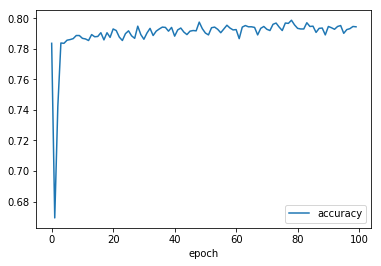

In [57]:
accuracy = pd.DataFrame()
accuracy['epoch'] = hist.epoch
accuracy['accuracy'] = hist.history['acc']
accuracy.plot.line(x='epoch', y='accuracy')

In [58]:
Y.sum(axis=0)

array([3838, 1060], dtype=uint32)

I have 3838 'bad' and 1060 'good', so guess 'bad'

In [59]:
3838/(3838+1060)

0.7835851367905268

Our classifier is about 80% right, but guessing is 78.3%

Maybe splitting better would give better results.